In [6]:
import numpy as np

#Iniciando uma classe Máquina de Vetores de Suporte
class SVM:

  def __init__(self, learning_rate, lambda_param, n_iters):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X ,y):
    n_samples, n_features = X.shape

    y = np.where(y <= 0, -1 , 1)

    # Iniciando o vetor w e o viés (b)
    self.w = np.zeros(n_features)
    self.b = 0

    for k in range(self.n_iters):
      for i, x_i in enumerate(X):
        margin = y[i]*(np.dot(self.w, x_i) + self.b) - 1 >= 0

        if margin:
          self.w = self.w -self.lr*(2*self.lambda_param*self.w)
        
        else:
          self.w = self.w - self.lr*(2*self.lambda_param*self.w - np.dot(x_i, y[i]))
          self.b = self.b - self.lr*y[i]

  def predict(self, X):
    approx = np.dot(X, self.w) + self.b
    return np.sign(approx)

SVM classification accuracy 1.0


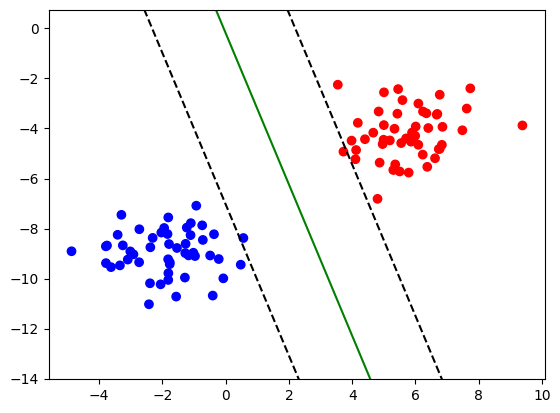

In [14]:
# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    clf = SVM(learning_rate = 0.001, lambda_param=0.001, n_iters=1000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, predictions))

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", cmap='bwr', c = y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()